

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [2]:
# your code here
from IPython import display #import display library

In [3]:
display.IFrame(src = 'https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en&pli=1&gid=1#gid=1',\
                width = 900, height = 500) #add website URL


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [4]:
import os
import numpy as np 
import pandas as pd

In [87]:
f = '/Users/nilshollestelle/Desktop/MADE Data 1/Labs/lab-01/lab-01/data/wikileaks.csv'

wiki_raw = pd.read_csv(f, header = 1, index_col= [0,1]) #read csv and make years+months part of index


wiki_raw.head()

Taliban Civilians Afghan forces  \
Year   Month                                      
2004.0 January       15        51            23   
       February     NaN         7             4   
       March         19         2           NaN   
       April          5         3            19   
       May           18        29            56   

                Nato (detailed in spreadsheet)  Nato - official figures  
Year   Month                                                             
2004.0 January                             NaN                     11.0  
       February                              5                      2.0  
       March                                 2                      3.0  
       April                               NaN                      3.0  
       May                                   6                      9.0

In [6]:
columns = wiki_raw.columns.to_list() #list of column manes
first_values = wiki_raw.iloc[0].to_list() #list of first row values

x = zip(columns,first_values) #pair lists

casualities = dict(x)

casualities

{'Taliban': '15',
 'Civilians': '51',
 'Afghan forces': '23',
 'Nato (detailed in spreadsheet)': nan,
 'Nato - official figures': 11.0}

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

In [7]:
import matplotlib
import seaborn as sns

Matplotlib created a temporary cache directory at /var/folders/hh/9p38b7xx6b50mvzqx94q5p_80000gn/T/matplotlib-qwm_yhr_ because the default path (/Users/nilshollestelle/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [121]:
df_civ = pd.read_csv(f, header = 1) #read csv and create index

df_civ.dropna(subset=['Year'], inplace = True) #drop NaN values 

df_civ['Year'] = df_civ['Year'].astype(int) #important(!), save astype() in new variable
df_civ['Civilians'] = df_civ['Civilians'].astype(float)
df_civ['Taliban'] = df_civ['Taliban'].astype(float)
df_civ['Nato - official figures'] = df_civ['Nato - official figures'].astype(float)


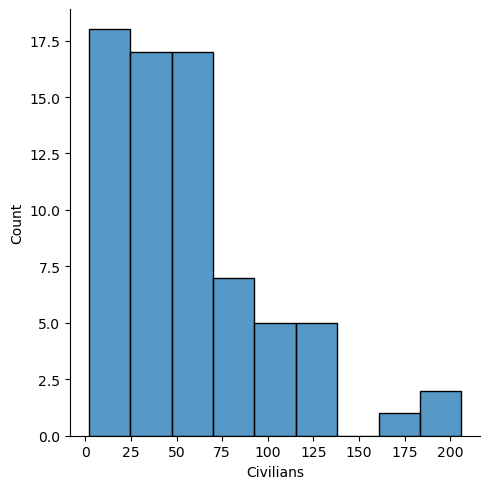

In [72]:
sns.displot(df_civ['Civilians'], kde = False);

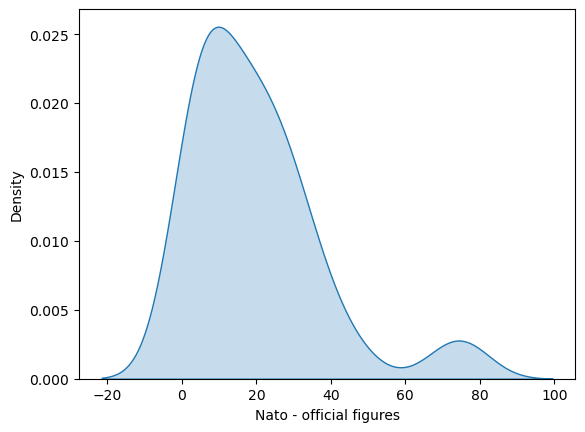

In [76]:
sns.kdeplot(wiki_raw['Nato - official figures'], fill=True);

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [124]:
df_tal = df_civ
#df_tal.dropna(subset='Year', inplace=True)

for index, row in df_tal.iterrows():
    print(row['Taliban'])


15.0
nan
19.0
5.0
18.0
163.0
21.0
20.0
33.0
13.0
21.0
15.0
6.0
14.0
38.0
118.0
113.0
143.0
75.0
90.0
89.0
122.0
36.0
48.0
26.0
12.0
36.0
52.0
85.0
295.0
220.0
161.0
945.0
333.0
325.0
216.0
125.0
152.0
76.0
166.0
199.0
564.0
485.0
551.0
917.0
462.0
270.0
172.0
86.0
139.0
90.0
128.0
177.0
306.0
303.0
326.0
142.0
485.0
479.0
223.0
185.0
209.0
202.0
240.0
406.0
526.0
557.0
445.0
614.0
462.0
410.0
287.0


In [166]:
df_over_100 = pd.DataFrame()
shortlist = []

for index, row in df_tal.iterrows():
   if row['Taliban'] > 200:
        shortlist.append(row['Taliban'])

#df_over_100 = pd.concat([shortlist])

#df_over_100


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

///Question 5

a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.

In [131]:
names = ['Civilians','Afghan forces']
type(names)

list